In [302]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
print("Entries in training data:")
print(df.shape)
print(df.head())

Entries in training data:
(70692, 22)
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0      

In [303]:
# check if there missing values
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

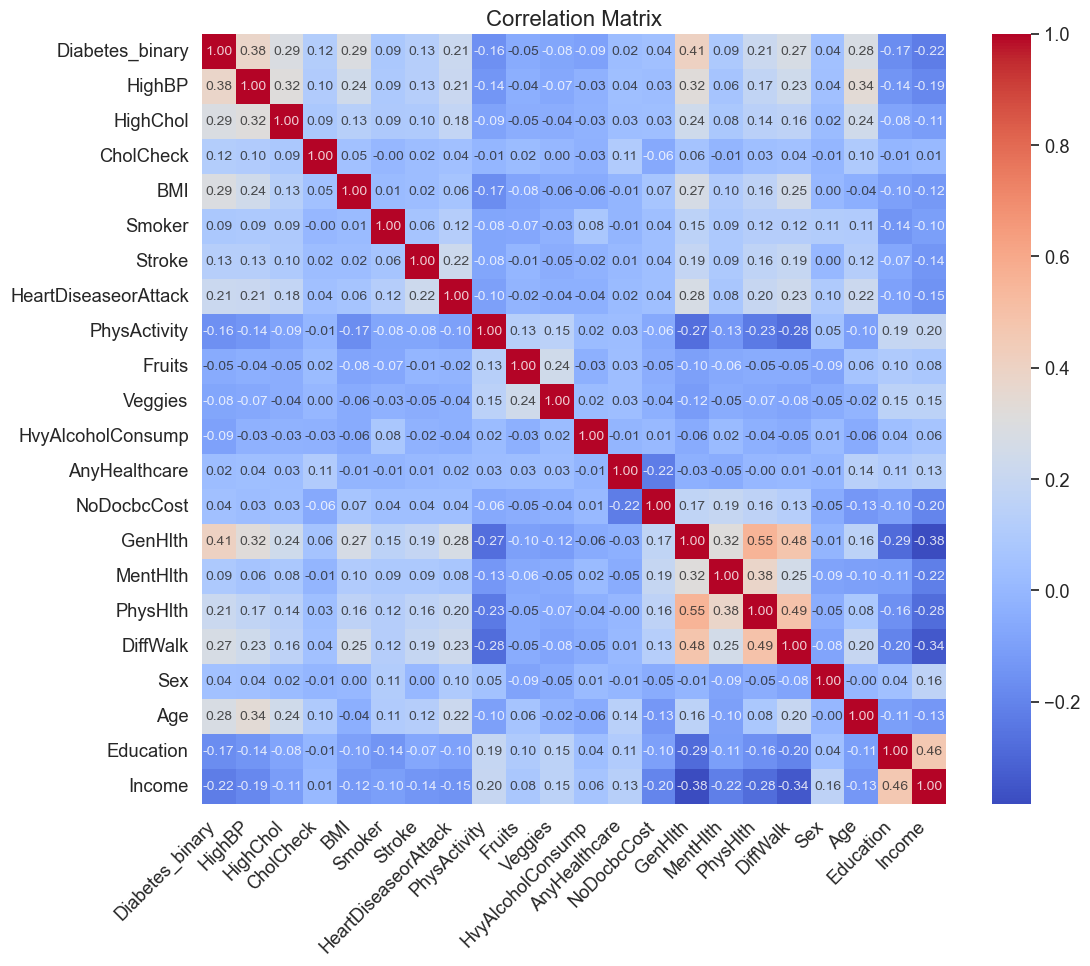

In [304]:
# HeatMap
corr = df.corr()

sns.set(font_scale=1.2) 
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"fontsize":10, 'alpha':0.8})

# Customize the labels
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')  # Rotate the x-axis labels
plt.yticks(rotation=0)
plt.show()

Accuracy: 0.7484970648560718
Precision: 0.7372639587012634
Recall: 0.7698964392112356
F1 score: 0.7532269257460097


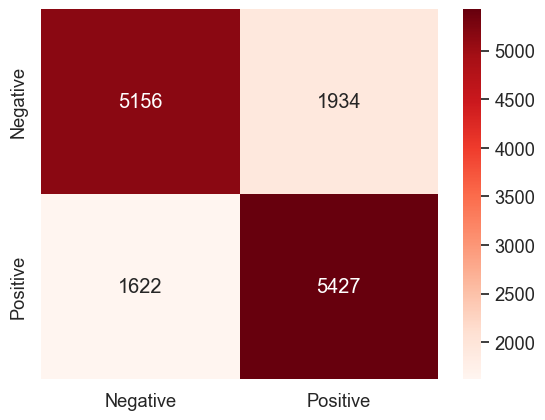

In [305]:
scaler = StandardScaler()
X1 = scaler.fit_transform(df.drop(columns=['Diabetes_binary']))
y1 = df['Diabetes_binary']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)
model1 = LogisticRegression()
model1.fit(X1_train, y1_train)
lr1_pred = model1.predict(X1_test)
accuracy1 = accuracy_score(y1_test, lr1_pred)
precision1 = precision_score(y1_test, lr1_pred)
recall1 = recall_score(y1_test, lr1_pred)
f1_1 = f1_score(y1_test, lr1_pred)
cm1 = confusion_matrix(y1_test, lr1_pred)
sns.heatmap(cm1, annot=True, fmt='g', cmap='Reds', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

print('Accuracy:', accuracy1)
print('Precision:', precision1)
print('Recall:', recall1)
print('F1 score:', f1_1)

Accuracy: 0.7496286866115001
Precision: 0.7452544704264099
Recall: 0.7624542640022516
F1 score: 0.7537562604340567


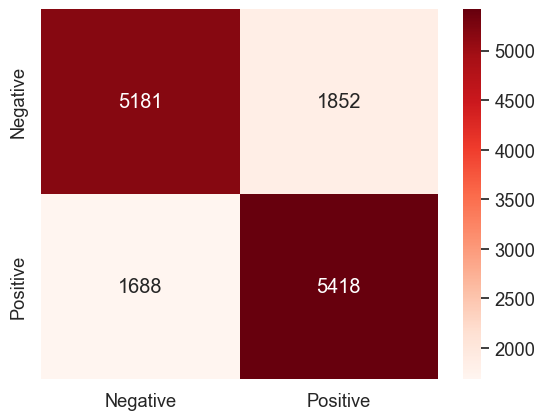

In [306]:
X2 = df[['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'Age', 'Income', 'NoDocbcCost']]
y2 = df['Diabetes_binary']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=5)
columns_to_standardize = ['BMI']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_standardize),
        ('passthrough', 'passthrough', X2_train.columns.difference(columns_to_standardize).tolist())
    ])
model2 = LogisticRegression(max_iter=1000)
pipeline1 = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', model2)
])
pipeline1.fit(X2_train, y2_train)

lr_pred2 = pipeline1.predict(X2_test)
accuracy2 = accuracy_score(y2_test, lr_pred2)
precision2 = precision_score(y2_test, lr_pred2)
recall2 = recall_score(y2_test, lr_pred2)
f1_2 = f1_score(y2_test, lr_pred2)
cm2 = confusion_matrix(y2_test, lr_pred2)
sns.heatmap(cm2, annot=True, fmt='g', cmap='Reds', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])


# Display the VIF values for the testing set
print('Accuracy:', accuracy2)
print('Precision:', precision2)
print('Recall:', recall2)
print('F1 score:', f1_2)

In [307]:
# Best and Worst Coefficients 
coef = model2.coef_[0]
predictors = X2.columns

# Create a dataframe and sort coefficients
coef_df = pd.DataFrame({'predictors': predictors, 'coefficient': coef})
coef_df = coef_df.reindex(coef_df['coefficient'].abs().sort_values(ascending=False).index)

# Print best and worst predictors
print('Best predictors:')
print(coef_df)

Best predictors:
             predictors  coefficient
4               GenHlth     0.764470
5                   Age     0.583422
2                   BMI     0.570098
0                HighBP     0.544147
3  HeartDiseaseorAttack     0.324096
1              HighChol     0.159105
7           NoDocbcCost    -0.076051
6                Income    -0.057487
